In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1569C046CA0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


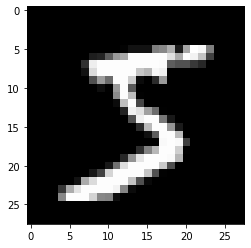

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


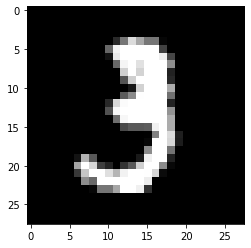

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


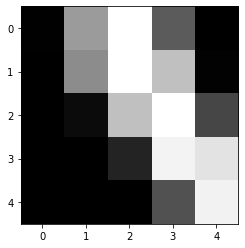

In [13]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0130, -0.0251, -0.0298,  ...,  0.0300,  0.0335,  0.0206],
        [-0.0343, -0.0117,  0.0067,  ..., -0.0210,  0.0025, -0.0137],
        [-0.0155,  0.0005, -0.0246,  ..., -0.0131,  0.0045,  0.0004],
        ...,
        [ 0.0139, -0.0070, -0.0023,  ...,  0.0107,  0.0255,  0.0047],
        [ 0.0033,  0.0107, -0.0265,  ..., -0.0302, -0.0340, -0.0164],
        [-0.0214,  0.0273,  0.0294,  ...,  0.0107,  0.0191, -0.0018]],
       requires_grad=True)

In [18]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([8, 7, 5, 1, 6, 6, 5, 0, 2, 8, 8, 3, 4, 0, 8, 8, 8, 7, 7, 1, 0, 7, 9, 1,
        5, 4, 5, 6, 4, 9, 9, 3, 8, 0, 0, 4, 9, 8, 4, 8, 8, 2, 7, 4, 0, 9, 1, 6,
        1, 7, 1, 2, 0, 2, 3, 4, 7, 1, 5, 7, 0, 1, 1, 1, 1, 6, 4, 2, 4, 7, 4, 6,
        1, 4, 6, 5, 9, 2, 9, 2, 8, 4, 8, 4, 9, 2, 2, 1, 1, 2, 5, 8, 7, 5, 4, 9,
        2, 6, 0, 2, 2, 2, 3, 4, 7, 5, 5, 2, 1, 2, 8, 9, 2, 3, 7, 5, 2, 3, 6, 0,
        3, 1, 1, 8, 6, 2, 3, 6])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [19]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [20]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [21]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0336, -0.0158,  0.0049,  ...,  0.0331,  0.0060, -0.0151],
         [-0.0159, -0.0168, -0.0145,  ..., -0.0100,  0.0167,  0.0325],
         [-0.0353,  0.0192, -0.0223,  ..., -0.0354, -0.0218, -0.0253],
         ...,
         [ 0.0125,  0.0016, -0.0211,  ...,  0.0019,  0.0044,  0.0081],
         [ 0.0111, -0.0179,  0.0097,  ...,  0.0135,  0.0089,  0.0346],
         [ 0.0172,  0.0045,  0.0294,  ...,  0.0211, -0.0273,  0.0094]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0336,  0.0227, -0.0146, -0.0108, -0.0063,  0.0301,  0.0333,  0.0338,
         -0.0308,  0.0278], requires_grad=True)]

In [22]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1140,  0.1161,  0.1785,  0.0399, -0.0903,  0.0183,  0.2426, -0.0180,
         -0.1180,  0.1155],
        [ 0.0348,  0.2533,  0.2048, -0.1828,  0.2924,  0.0760,  0.3237,  0.0649,
          0.0368, -0.0680]])


In [23]:
import torch.nn.functional as F

In [24]:
outputs[:2]

tensor([[ 0.1140,  0.1161,  0.1785,  0.0399, -0.0903,  0.0183,  0.2426, -0.0180,
         -0.1180,  0.1155],
        [ 0.0348,  0.2533,  0.2048, -0.1828,  0.2924,  0.0760,  0.3237,  0.0649,
          0.0368, -0.0680]], grad_fn=<SliceBackward0>)

In [25]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1049, 0.1052, 0.1119, 0.0974, 0.0855, 0.0954, 0.1193, 0.0920, 0.0832,
         0.1051],
        [0.0923, 0.1148, 0.1093, 0.0742, 0.1194, 0.0961, 0.1232, 0.0951, 0.0924,
         0.0832]])
Sum:  1.0


In [26]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 6, 3, 4, 6, 8, 1, 6, 6, 6, 8, 6, 2, 2, 1, 6, 4, 1, 2, 6, 4, 6, 4, 6,
        6, 4, 1, 6, 7, 6, 6, 0, 6, 1, 1, 1, 1, 6, 7, 1, 6, 0, 6, 7, 6, 6, 6, 3,
        2, 4, 6, 6, 6, 4, 1, 2, 6, 7, 4, 6, 6, 4, 1, 7, 6, 6, 4, 1, 6, 6, 0, 6,
        1, 4, 4, 6, 1, 8, 8, 4, 6, 6, 8, 6, 0, 6, 0, 4, 6, 6, 4, 6, 8, 6, 4, 6,
        6, 5, 1, 0, 3, 6, 6, 6, 6, 1, 4, 7, 6, 2, 1, 7, 6, 6, 6, 1, 1, 7, 6, 4,
        0, 6, 6, 6, 6, 4, 6, 6])
tensor([0.1193, 0.1232, 0.1215, 0.1112, 0.1607, 0.1255, 0.1356, 0.1299, 0.1291,
        0.1197, 0.1283, 0.1457, 0.1177, 0.1208, 0.1258, 0.1363, 0.1298, 0.1416,
        0.1249, 0.1365, 0.1282, 0.1400, 0.1231, 0.1301, 0.1123, 0.1308, 0.1279,
        0.1217, 0.1174, 0.1413, 0.1528, 0.1279, 0.1449, 0.1399, 0.1231, 0.1195,
        0.1433, 0.1362, 0.1197, 0.1503, 0.1701, 0.1389, 0.1316, 0.1453, 0.1397,
        0.1467, 0.1414, 0.1171, 0.1246, 0.1566, 0.1233, 0.1550, 0.1506, 0.1239,
        0.1264, 0.1185, 0.1314, 0.1546, 0.1282, 0.1384, 0.1458, 0.1265, 0.1421,
       

In [27]:
labels

tensor([7, 7, 1, 1, 5, 4, 9, 1, 8, 7, 6, 3, 4, 0, 4, 7, 4, 8, 7, 0, 7, 8, 2, 7,
        1, 6, 9, 2, 1, 8, 6, 6, 0, 0, 7, 7, 5, 6, 5, 8, 7, 2, 4, 0, 7, 6, 2, 7,
        7, 5, 7, 2, 3, 7, 6, 5, 6, 2, 0, 0, 5, 7, 0, 1, 0, 6, 3, 8, 4, 8, 1, 1,
        3, 4, 7, 1, 5, 4, 6, 5, 1, 8, 6, 7, 2, 9, 1, 6, 9, 0, 5, 8, 7, 7, 3, 4,
        2, 4, 9, 1, 0, 9, 2, 4, 7, 9, 5, 6, 0, 0, 5, 1, 9, 6, 8, 4, 8, 6, 3, 9,
        1, 1, 6, 1, 3, 4, 9, 8])

In [28]:
outputs[:2]

tensor([[ 0.1140,  0.1161,  0.1785,  0.0399, -0.0903,  0.0183,  0.2426, -0.0180,
         -0.1180,  0.1155],
        [ 0.0348,  0.2533,  0.2048, -0.1828,  0.2924,  0.0760,  0.3237,  0.0649,
          0.0368, -0.0680]], grad_fn=<SliceBackward0>)

In [29]:
torch.sum(preds == labels)

tensor(10)

In [30]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [31]:
accuracy(outputs, labels)

tensor(0.0781)

In [32]:
preds

tensor([6, 6, 3, 4, 6, 8, 1, 6, 6, 6, 8, 6, 2, 2, 1, 6, 4, 1, 2, 6, 4, 6, 4, 6,
        6, 4, 1, 6, 7, 6, 6, 0, 6, 1, 1, 1, 1, 6, 7, 1, 6, 0, 6, 7, 6, 6, 6, 3,
        2, 4, 6, 6, 6, 4, 1, 2, 6, 7, 4, 6, 6, 4, 1, 7, 6, 6, 4, 1, 6, 6, 0, 6,
        1, 4, 4, 6, 1, 8, 8, 4, 6, 6, 8, 6, 0, 6, 0, 4, 6, 6, 4, 6, 8, 6, 4, 6,
        6, 5, 1, 0, 3, 6, 6, 6, 6, 1, 4, 7, 6, 2, 1, 7, 6, 6, 6, 1, 1, 7, 6, 4,
        0, 6, 6, 6, 6, 4, 6, 6])

In [34]:
outputs

tensor([[ 0.1140,  0.1161,  0.1785,  ..., -0.0180, -0.1180,  0.1155],
        [ 0.0348,  0.2533,  0.2048,  ...,  0.0649,  0.0368, -0.0680],
        [-0.1354,  0.0363,  0.0611,  ..., -0.0202, -0.0678,  0.0845],
        ...,
        [ 0.1190,  0.0990,  0.0531,  ..., -0.0039, -0.0852,  0.0191],
        [-0.0306,  0.0849, -0.2595,  ..., -0.1071,  0.0009, -0.2529],
        [ 0.1542,  0.1735, -0.1432,  ...,  0.0903,  0.0171, -0.1768]],
       grad_fn=<AddmmBackward0>)

In [35]:
loss_fn = F.cross_entropy
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3453, grad_fn=<NllLossBackward0>)


In [36]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [37]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [38]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [39]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3091108798980713, 'val_acc': 0.11956091970205307}

In [40]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9362, val_acc: 0.6275
Epoch [1], val_loss: 1.6659, val_acc: 0.7405
Epoch [2], val_loss: 1.4642, val_acc: 0.7744
Epoch [3], val_loss: 1.3120, val_acc: 0.7946
Epoch [4], val_loss: 1.1951, val_acc: 0.8061


In [41]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1034, val_acc: 0.8134
Epoch [1], val_loss: 1.0299, val_acc: 0.8203
Epoch [2], val_loss: 0.9698, val_acc: 0.8261
Epoch [3], val_loss: 0.9198, val_acc: 0.8297
Epoch [4], val_loss: 0.8777, val_acc: 0.8329


In [42]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8415, val_acc: 0.8363
Epoch [1], val_loss: 0.8102, val_acc: 0.8394
Epoch [2], val_loss: 0.7828, val_acc: 0.8428
Epoch [3], val_loss: 0.7587, val_acc: 0.8447
Epoch [4], val_loss: 0.7372, val_acc: 0.8460


In [43]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7179, val_acc: 0.8475
Epoch [1], val_loss: 0.7005, val_acc: 0.8503
Epoch [2], val_loss: 0.6847, val_acc: 0.8517
Epoch [3], val_loss: 0.6702, val_acc: 0.8534
Epoch [4], val_loss: 0.6570, val_acc: 0.8550


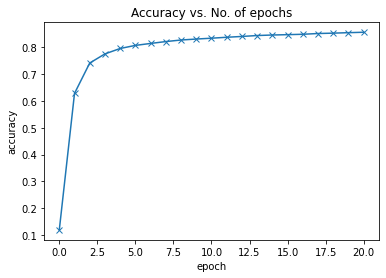

In [44]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [45]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


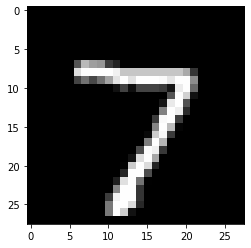

In [46]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [47]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


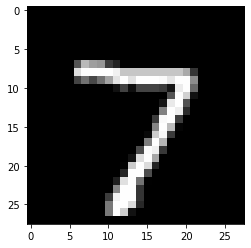

In [48]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


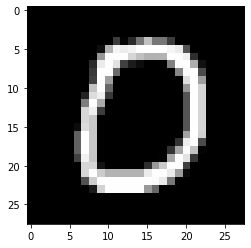

In [49]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


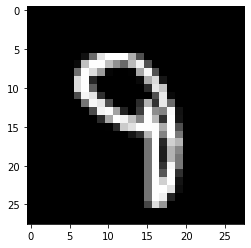

In [50]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


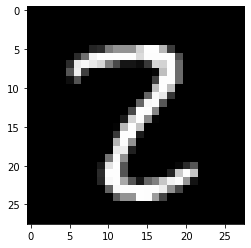

In [51]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [52]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6387361288070679, 'val_acc': 0.8614257574081421}

In [53]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [54]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0280,  0.0185,  0.0079,  ...,  0.0184,  0.0077, -0.0169],
                      [ 0.0256,  0.0132, -0.0331,  ...,  0.0220,  0.0147, -0.0150],
                      [ 0.0321, -0.0237,  0.0234,  ..., -0.0049,  0.0125,  0.0165],
                      ...,
                      [-0.0074,  0.0081,  0.0008,  ..., -0.0192, -0.0111, -0.0225],
                      [-0.0349,  0.0348,  0.0108,  ...,  0.0321, -0.0263, -0.0011],
                      [-0.0340, -0.0215, -0.0051,  ..., -0.0355, -0.0003, -0.0137]])),
             ('linear.bias',
              tensor([-0.0223,  0.0686,  0.0043, -0.0125,  0.0160,  0.0442, -0.0409,  0.0129,
                      -0.1028, -0.0452]))])

In [55]:
model2 = MnistModel()
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0107, -0.0172, -0.0062,  ..., -0.0197,  0.0124, -0.0287],
                      [-0.0021, -0.0339, -0.0147,  ..., -0.0239,  0.0356, -0.0250],
                      [ 0.0026, -0.0216, -0.0001,  ..., -0.0010,  0.0137,  0.0153],
                      ...,
                      [-0.0152,  0.0258,  0.0331,  ..., -0.0352,  0.0324,  0.0307],
                      [ 0.0047, -0.0322, -0.0356,  ...,  0.0014,  0.0118,  0.0320],
                      [-0.0207,  0.0355,  0.0021,  ..., -0.0037, -0.0026, -0.0175]])),
             ('linear.bias',
              tensor([ 0.0356,  0.0286,  0.0057, -0.0297, -0.0071,  0.0324,  0.0106,  0.0081,
                      -0.0020, -0.0240]))])

In [56]:
evaluate(model2, test_loader)

{'val_loss': 2.3065834045410156, 'val_acc': 0.13046875596046448}

In [57]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0280,  0.0185,  0.0079,  ...,  0.0184,  0.0077, -0.0169],
                      [ 0.0256,  0.0132, -0.0331,  ...,  0.0220,  0.0147, -0.0150],
                      [ 0.0321, -0.0237,  0.0234,  ..., -0.0049,  0.0125,  0.0165],
                      ...,
                      [-0.0074,  0.0081,  0.0008,  ..., -0.0192, -0.0111, -0.0225],
                      [-0.0349,  0.0348,  0.0108,  ...,  0.0321, -0.0263, -0.0011],
                      [-0.0340, -0.0215, -0.0051,  ..., -0.0355, -0.0003, -0.0137]])),
             ('linear.bias',
              tensor([-0.0223,  0.0686,  0.0043, -0.0125,  0.0160,  0.0442, -0.0409,  0.0129,
                      -0.1028, -0.0452]))])

In [58]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6387361288070679, 'val_acc': 0.8614257574081421}